Proyecto: Telecom X - Etapa 1
==============================

## Abandono (Churn) de clientes

## √çndice

1. Descripci√≥n del proyecto.
2. Importaci√≥n de librer√≠as y extracci√≥n de datos.
3. An√°lisis Exploratorio de Datos (EDA).
   - Exploraci√≥n.
   - Transformaci√≥n.
   - An√°lisis y visualizaci√≥n de datos.

# 1. Descripci√≥n del proyecto

Proyecto "Churn de Clientes" para la compa√±√≠a Telecom X. 

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la p√©rdida de clientes.

Tu desaf√≠o ser√° recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer informaci√≥n valiosa. A partir de tu an√°lisis, el equipo de Data Science podr√° avanzar en modelos predictivos y desarrollar estrategias para reducir la evasi√≥n.

# 2. Importaci√≥n de librer√≠as y extracci√≥n de datos

## Importaci√≥n de librer√≠as

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

from IPython.display import clear_output

## Extracci√≥n de datos

In [2]:
# API donde se encuentra los datos
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

# Solicitud a la API
r = requests.get(url)

# Imprimir estado de la respuesta
print(r.status_code)
# Verificar tipo de contenido
print(r.headers['Content-type'])

# Escribir el archivo para normalizaci√≥n
with open('TelecomX_Data.json', 'wb') as f:
    f.write(r.content)

200
text/plain; charset=utf-8


In [3]:
# Leer el archivo
with open('TelecomX_Data.json', 'r') as f:
    raw_data = json.loads(f.read())

In [4]:
# Normalizaci√≥n del JSON
raw_data = pd.json_normalize(raw_data)

In [5]:
raw_data[raw_data['internet.InternetService'] == 'No']

customerID Churn customer.gender  customer.SeniorCitizen  \
20    0023-UYUPN    No          Female                       1   
23    0030-FNXPP    No          Female                       0   
24    0031-PVLZI   Yes          Female                       0   
27    0040-HALCW    No            Male                       0   
28    0042-JVWOJ    No            Male                       0   
...          ...   ...             ...                     ...   
7250  9970-QBCDA    No          Female                       0   
7252  9972-EWRJS    No          Female                       0   
7256  9975-GPKZU    No            Male                       0   
7257  9975-SKRNR    No            Male                       0   
7261  9986-BONCE   Yes          Female                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
20                Yes                  No               50                Yes   
23                 No                  No                3                Yes   
24                Yes                 Yes                4                Yes   
27                Yes                 Yes               54                Yes   
28                 No                  No               26                Yes   
...               ...                 ...              ...                ...   
7250               No                  No                6                Yes   
7252              Yes                 Yes               67                Yes   
7256              Yes                 Yes               46                Yes   
7257               No                  No                1                Yes   
7261               No                  No                4                Yes   

     phone.MultipleLines internet.InternetService  ... internet.OnlineBackup  \
20                   Yes                       No  ...   No internet service   
23                    No                       No  ...   No internet service   
24                    No                       No  ...   No internet service   
27                    No                       No  ...   No internet service   
28                    No                       No  ...   No internet service   
...                  ...                      ...  ...                   ...   
7250                  No                       No  ...   No internet service   
7252                  No                       No  ...   No internet service   
7256                  No                       No  ...   No internet service   
7257                  No                       No  ...   No internet service   
7261                  No                       No  ...   No internet service   

     internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
20         No internet service  No internet service  No internet service   
23         No internet service  No internet service  No internet service   
24         No internet service  No internet service  No internet service   
27         No internet service  No internet service  No internet service   
28         No internet service  No internet service  No internet service   
...                        ...                  ...                  ...   
7250       No internet service  No internet service  No internet service   
7252       No internet service  No internet service  No internet service   
7256       No internet service  No internet service  No internet service   
7257       No internet service  No internet service  No internet service   
7261       No internet service  No internet service  No internet service   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
20        No internet service         One year                       No   
23        No internet service   Month-to-month                       No   
24        No internet service   Month-to-month                       No   
27        No internet service         Two year                    

In [6]:
# Guardar el archivo JSON normalizado
raw_data.to_json('TelecomX_Data_norm.json')

In [7]:
columnas = raw_data.columns
columnas

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [8]:
nuevas_columnas = [
    columnas
    .str.replace('customer.', '')
    .str.replace('phone.', '')   
    .str.replace('internet.', '')
    .str.replace('account.', '').tolist()
]

In [9]:
nuevas_columnas

[['customerID',
  'Churn',
  'gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Charges.Monthly',
  'Charges.Total']]

In [10]:
# Crear copia para mantener datos en su estado original por si se necesitan
df = raw_data.copy()

# Utilizar la lista con las columnas con nombres normalizados
df.columns = nuevas_columnas[0]

# 3. An√°lisis Exploratorio de Datos (EDA)

## 3.1 Exploraci√≥n y Transformaci√≥n de datos

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Observaciones:

El conjunto de datos al parecer no presenta valores nulos *(Missing values)*.<br>
Sin embargo, podemos observar que si bien `'Charges.Monthly'` tiene tipo de dato `float64`, `'Charges.Total'` no ha sido tomada como columna num√©rica, a pesar de que a simple vista parece contener solo informaci√≥n num√©rica. Esto puede deberse a que haya valores mal cargados. Por lo que habr√° que investigar m√°s en detalle esta columna.

### Variables num√©ricas

In [12]:
# Intentar convertir la columna a tipo coma flotante para ver que error arroja
#df['Charges.Total'].astype(np.float64)

El error obtenido indica que no se puede convertir `' '` en `float64`.
Por lo que inicialmente reemplazar√© dicho string por 0 e intentar ejecutar el c√≥digo anterior nuevamente para ver si esto soluciona el problema

In [13]:
df[df['Charges.Total'] == ' ']

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
975            No  No phone service             DSL  ...                  Yes   
1775          Yes                No              No  ...  No internet service   
1955          Yes               Yes             DSL  ...                  Yes   
2075          Yes                No              No  ...  No internet service   
2232          Yes                No              No  ...  No internet service   
2308          Yes               Yes              No  ...  No internet service   
2930          Yes               Yes             DSL  ...                  Yes   
3134          Yes               Yes              No  ...  No internet service   
3203           No  No phone service             DSL  ...                   No   
4169          Yes                No             DSL  ...                  Yes   
5599          Yes                No              No  ...  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
975                   Yes                  Yes                  Yes   
1775  No internet service  No internet service  No internet service   
1955                   No                  Yes                   No   
2075  No internet service  No internet service  No internet service   
2232  No internet service  No internet service  No internet service   
2308  No internet service  No internet service  No internet service   
2930                  Yes                  Yes                  Yes   
3134  No internet service  No internet service  No internet service   
3203                  Yes                  Yes                  Yes   
4169                  Yes                   No                  Yes   
5599  No internet service  No internet service  No internet service   

          StreamingMovies  Contract PaperlessBilling  \
975                    No  Two year               No   
1775  No internet service  Two year               No   
1955                   No  Two year              Yes   
2075  No internet service  One year              Yes   
2232  No internet service  Two year               No   
2308  No internet service  Two year               No   
2930                   No  Two year               No   
3134  No internet service  Two year               No   
3203                   No  Two year              Yes   
4169                  Yes  Two year               No   
5599  No internet service  Two year               No   

                  PaymentMethod Charges.Monthly  Charges.Total  
975     Credit card (automatic)           56.05                 
1775               Mailed check           20.00                 
1955  Bank transfer (automatic)           61.90                 
2075               Mailed check           19.70                 
2232               Mailed check           20.25                 
2308               Mailed check           25.35                 
2930               Mailed check           73.35                 
3134               Mailed check           25.75                 
3203  Ban

In [14]:
df[df['Charges.Total'] == ' '].index == df[df['tenure'] == 0].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

#### Observaciones: Valores faltantes `Charges.Total`

Es posible observar que los valores faltantes en Charge.Total pertenecen a aquellos contratos nuevos que aun no tienen siquiera un mes de antiguedad, por lo que aun no se les ha cobrado por el servicio, lo que lleva a que no tengan nada en dicha columna.
Esto sera solucionado reemplazando el espacio en blanco por 0.

In [15]:
df['Charges.Total'] = df['Charges.Total'].replace(' ', '0')

In [16]:
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### 3.1.2 Variables categ√≥ricas

Lo primero ser√° verificar que la columna `customerID` tenga la misma cantidad de valores √∫nicos como filas en el DataFrame

In [18]:
len(df['customerID'].unique())

7267

Se puede observar que la columna `customerID` cuenta con 7267 valores unicos, que es exactamente la cantidad de registros en el DataFrame, lo que quiere decir que no hay registros duplicados.

In [19]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [20]:
columnas_categoricas = ['Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
for columna in columnas_categoricas:
    print(f'Valores unicos en columna {columna}:\n{df[columna].unique()}\n')

Valores unicos en columna Churn:
['No' 'Yes' '']

Valores unicos en columna gender:
['Female' 'Male']

Valores unicos en columna SeniorCitizen:
[0 1]

Valores unicos en columna Partner:
['Yes' 'No']

Valores unicos en columna Dependents:
['Yes' 'No']

Valores unicos en columna PhoneService:
['Yes' 'No']

Valores unicos en columna MultipleLines:
['No' 'Yes' 'No phone service']

Valores unicos en columna InternetService:
['DSL' 'Fiber optic' 'No']

Valores unicos en columna OnlineSecurity:
['No' 'Yes' 'No internet service']

Valores unicos en columna OnlineBackup:
['Yes' 'No' 'No internet service']

Valores unicos en columna DeviceProtection:
['No' 'Yes' 'No internet service']

Valores unicos en columna TechSupport:
['Yes' 'No' 'No internet service']

Valores unicos en columna StreamingTV:
['Yes' 'No' 'No internet service']

Valores unicos en columna StreamingMovies:
['No' 'Yes' 'No internet service']

Valores unicos en columna Contract:
['One year' 'Month-to-month' 'Two year']

Valores 

#### Observaciones iniciales: Variables categ√≥ricas

* La variable `Churn` tambien presenta valores incomplentos, solo que estan disfrazados por `' '`, por eso no fueron captados en el comando `df.info()`
* La variable `SeniorCitizen` tiene valores `0 y 1`. Esto resulta inconsistente con el resto de variables que toman valores `Yes` y `No`. Si bien el formato de esta columna ser√≠a el correcto para el equipo de Data Science, temporalmente mantendr√© el formato del resto de columnas ya que estar√© analizando car√°cteristicas, al final entregar√© el conjunto de datos con las variables mapeadeas correctamente para su utilizaci√≥n en modelos predictivos.
* Otra observaci√≥n es que existe cierta informaci√≥n que puede resultar redundante. Todas los clientes que tengan `InternetService == 'No'`, tendr√°n las columnas `[OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies] == 'No internet service'`. Para mantener una uniformidad categ√≥rica, simplemente cambiar√© ese `'No internet service'` por `'No'`. Lo mismo para la columna `MultipleLines` donde el valor es `No phone service`

In [21]:
# Mapeo columna SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda row: 'Yes' if row == 1 else 'No')

In [22]:
int_service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

In [23]:
df['MultipleLines'] = df['MultipleLines'].apply(lambda row: row.replace('No phone service', 'No'))

In [24]:
for columna in int_service_columns:
    df[columna] = df[columna].apply(lambda row: row.replace('No internet service', 'No'))

In [25]:
columnas_categoricas = ['Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
for columna in columnas_categoricas:
    print(f'Valores unicos en columna {columna}:\n{df[columna].unique()}\n')

Valores unicos en columna Churn:
['No' 'Yes' '']

Valores unicos en columna gender:
['Female' 'Male']

Valores unicos en columna SeniorCitizen:
['No' 'Yes']

Valores unicos en columna Partner:
['Yes' 'No']

Valores unicos en columna Dependents:
['Yes' 'No']

Valores unicos en columna PhoneService:
['Yes' 'No']

Valores unicos en columna MultipleLines:
['No' 'Yes']

Valores unicos en columna InternetService:
['DSL' 'Fiber optic' 'No']

Valores unicos en columna OnlineSecurity:
['No' 'Yes']

Valores unicos en columna OnlineBackup:
['Yes' 'No']

Valores unicos en columna DeviceProtection:
['No' 'Yes']

Valores unicos en columna TechSupport:
['Yes' 'No']

Valores unicos en columna StreamingTV:
['Yes' 'No']

Valores unicos en columna StreamingMovies:
['No' 'Yes']

Valores unicos en columna Contract:
['One year' 'Month-to-month' 'Two year']

Valores unicos en columna PaperlessBilling:
['Yes' 'No']

Valores unicos en columna PaymentMethod:
['Mailed check' 'Electronic check' 'Credit card (auto

In [26]:
df[df['Churn'] == '']

customerID Churn  gender SeniorCitizen Partner Dependents  tenure  \
30    0047-ZHDTW        Female            No      No         No      11   
75    0120-YZLQA          Male            No      No         No      71   
96    0154-QYHJU          Male            No      No         No      29   
98    0162-RZGMZ        Female           Yes      No         No       5   
175   0274-VVQOQ          Male           Yes     Yes         No      65   
...          ...   ...     ...           ...     ...        ...     ...   
7158  9840-GSRFX        Female            No      No         No      14   
7180  9872-RZQQB        Female            No     Yes         No      49   
7211  9920-GNDMB          Male            No      No         No       9   
7239  9955-RVWSC        Female            No     Yes        Yes      67   
7247  9966-VYRTZ        Female            No     Yes        Yes      31   

     PhoneService MultipleLines InternetService  ... OnlineBackup  \
30            Yes           Yes     Fiber optic  ...           No   
75            Yes            No              No  ...           No   
96            Yes            No             DSL  ...          Yes   
98            Yes            No             DSL  ...          Yes   
175           Yes           Yes     Fiber optic  ...          Yes   
...           ...           ...             ...  ...          ...   
7158          Yes           Yes             DSL  ...          Yes   
7180           No            No             DSL  ...           No   
7211          Yes           Yes     Fiber optic  ...           No   
7239          Yes            No              No  ...           No   
7247          Yes            No              No  ...           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
30                 No          No          No              No  Month-to-month   
75                 No          No          No              No        Two year   
96                 No         Yes          No              No        One year   
98                 No         Yes          No              No  Month-to-month   
175               Yes          No         Yes             Yes        One year   
...               ...         ...         ...             ...             ...   
7158               No          No          No              No        One year   
7180               No          No         Yes              No  Month-to-month   
7211               No          No          No              No  Month-to-month   
7239               No          No          No              No        Two year   
7247               No          No          No              No  Month-to-month   

     PaperlessBilling              PaymentMethod Charges.Monthly  \
30                Yes  Bank transfer (automatic)           79.00   
75                Yes    Credit card (automatic)           19.90   
96                Yes           Electronic check           58.75   
98                 No    Credit card (automatic)           59.90   
175               Yes  Bank transfer (automatic)          103.15   
...               ...                        ...             ...   
7158              Yes               Mailed check           54.25   
7180               No  Bank transfer (automatic)           40.65   
7211              Yes           Electronic check           76.25   
7239              Yes  Bank transfer (automatic)           19.25   
7247              Yes               Mailed check           19.55   

      Charges.Total  
30           929.30  
75          1355.10  
96          1696.20  
98           287.85  
175         6792.45  
...             ...  
7158         773.20  
7180        2070.75  
7211         684.85  
7239        1372.90  
7247         658.95  

[224 rows x 21 columns]

In [27]:
print(f'Porcentaje de Valores faltantes en etiqueta objetivo: {round(224 / df.shape[0] * 100,2)}%')

Porcentaje de Valores faltantes en etiqueta objetivo: 3.08%


#### Observaciones:

Ya que lo que se busca analizar es justamente el **Churn** de clientes, completar 224 registros ser√≠a perjudicar el an√°lisis, ya que esto es an√°lisis de datos, no predicci√≥n, por lo que estoy analizando lo "historico", no puedo inferir si estos tienen `Churn == Yes` o `Churn == No`.<br> 
Se podr√≠an aplicar t√©cnicas de ML no supervisado como KMeans para etiquetar los datos, pero por lo pronto dejar√© estos registros almacenados en una variable aparte para no descartarlos por completo.

In [28]:
df_churn = df.copy()
df_unknown = df_churn.query('Churn != "Yes" & Churn != "No"')
df_churn = df_churn.query('Churn == "Yes" | Churn == "No"')
df_unknown['Churn'] = df_unknown['Churn'].apply(lambda row: row.replace('', 'Unknown'))

In [29]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [30]:
df_churn.describe()

tenure  Charges.Monthly  Charges.Total
count  7043.000000      7043.000000    7043.000000
mean     32.371149        64.761692    2279.734304
std      24.559481        30.090047    2266.794470
min       0.000000        18.250000       0.000000
25%       9.000000        35.500000     398.550000
50%      29.000000        70.350000    1394.550000
75%      55.000000        89.850000    3786.600000
max      72.000000       118.750000    8684.800000

## 3.2 An√°lisis y visualizaci√≥n de datos

Para comprender mejor los factores que influyen en el abandono de clientes en la empresa Telecom X, se plantean las siguientes preguntas orientadoras del an√°lisis:

**Antig√ºedad y facturaci√≥n**

1. ¬øExiste relaci√≥n entre la antig√ºedad del cliente y el abandono?
2. ¬øExiste relaci√≥n entre el gasto mensual del cliente y su tendencia a dejar la empresa?
3. ¬øExiste relaci√≥n en el gasto total a lo largo del ciclo de vida del cliente en la empresa y la posiblidad de abandono?

**Servicios**

4. ¬øLos clientes que tienden a abandonar la empresa cuentan con servicio de tel√©fono, internet o ambos?
5. ¬øExiste relaci√≥n entre la cantidad de servicios contratados y el abandono del cliente?

**Perfil del cliente**

6. ¬øAlg√∫n g√©nero tiene mayor tendencia a dejar la empresa?
7. ¬øLa edad (espec√≠ficamente ser un ciudadano mayor), influye en la posibilidad de que un cliente abandone?
8. ¬øExiste relaci√≥n entre la situaci√≥n familiar del cliente *(pareja, personas a cargo)* y la posibilidad de abandono?

### Exploraci√≥n: Balance del dataset

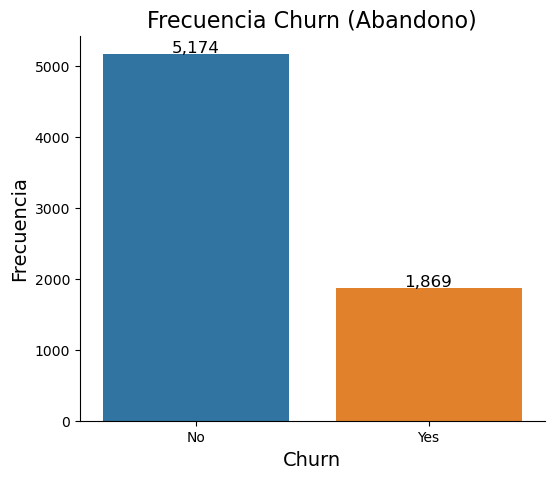

In [31]:
churns = df_churn.groupby('Churn')['Churn'].value_counts()
churns = pd.DataFrame(churns)

fig, ax = plt.subplots(figsize=(6,5))
ax = sns.barplot(data=churns, x=churns.index, y=churns['count'], hue=churns.index, palette='tab10')
ax.set_title('Frecuencia Churn (Abandono)', fontsize=16)
ax.set_xlabel('Churn',fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)
for bar in ax.patches:
            # Obtener la altura de la barra (frecuencia)
            altura = bar.get_height()
            # Funci√≥n para escribir sobre la figura
            ax.text(
                # Obtener el punto de iniciaci√≥n de la barra y su ancho y luego dividir por 2 para ubicar la etiqueta en el centro
                bar.get_x() + bar.get_width() / 2,
                # Aumentar la altura de la barra para separar el texto
                altura + 30,
                # convertir el valor en integer
                f'{round(altura):,.0f}',
                # Centrar la etiqueta
                ha='center',
                # Configurar el tama√±o de la letra de la etiqueta
                fontsize=12)
sns.despine()
plt.show()

In [32]:
print(f'No = {round(churns.loc["No", "count"] / len(df_churn) * 100, 2)}%\nYes = {round(churns.loc["Yes", "count"] / len(df_churn) * 100, 2)}%')

No = 73.46%
Yes = 26.54%


### Antig√ºedad y facturaci√≥n

#### üìå 1. ¬øExiste relaci√≥n entre la antig√ºedad del cliente y el abandono?

Este ser√° el primer an√°lisis ya que la relaci√≥n entre la antig√ºedad del cliente y su tendencia a dejar la empresa ofrecer√° un panorama general para entender que segmento (antiguos o nuevos) es m√°s propenso a irse.

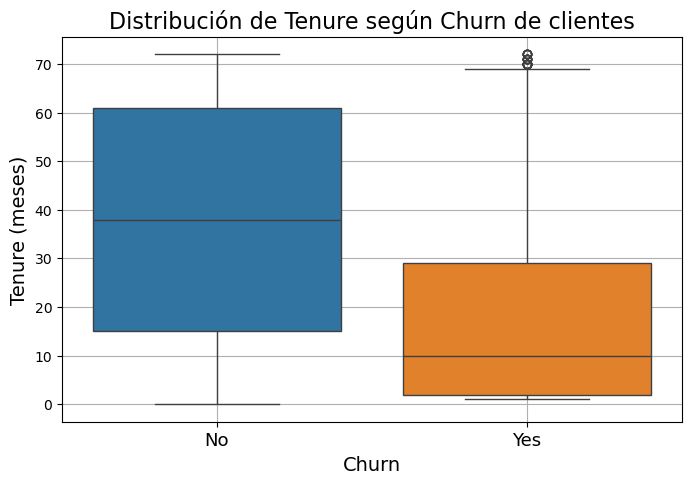

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_churn, x='Churn', y='tenure', hue='Churn', palette='tab10')
plt.title('Distribuci√≥n de Tenure seg√∫n Churn de clientes', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Tenure (meses)', fontsize=14)
plt.xticks(fontsize=13)
plt.grid(True)
plt.show()

#### Observaciones: Boxplot de Tenure (antig√ºedad) seg√∫n Churn (abandono) de clientes.

`Boxplot Churn == 'Yes'`

*Caracter√≠sticas*:
* Los lados de la caja van de los valores 2 hasta 29 meses aproximadamente
* Mediana ubicada en el valor 10
* El bigote inferior se encuentra en el valor 1 y el bigote superior en 69 aproximadamente, con unos cuantos valores at√≠picos *(outliers)* por encima.

*Interpretaci√≥n:*

* La caja es m√°s compacta a comparaci√≥n del Boxplot de `Churn == 'No'` lo que indica una distribuci√≥n m√°s concentrada.
* **Mediana = 10**: el 50% de los clientes que abandonan la empresa lo hacen con 10 meses o menos de antig√ºedad.
* **El tercer cuartil (Q3)** se ubica en 29 meses, lo que indica que el 75% de los clientes que se dan de baja lo hacen antes de cumplir 30 meses con la empresa.

`Boxplot Churn == 'No'`

*Caracter√≠sticas*

* La caja se extiende desde los 16 hasta los 61 meses aproximadamente.
* La mediana est√° en torno a los 38 meses.
* El bigote inferior llega hasta 0 y el bigote superior hasta 72.  

*Interpretaci√≥n:*

* La distribuci√≥n es m√°s sim√©trica y extendida, indicando una mayor variabilidad en los clientes que permanecen en la empresa.
* La mediana de 38 sugiere que la mitad de los clientes m√°s leales tienen m√°s de 3 a√±os de antig√ºedad.


**Conclusiones:**

* Existe una fuerte tendencia al abandono entre los clientes nuevos. La mayor√≠a de las bajas ocurren antes del primer a√±o.
* Ser√≠a interesante analizar las diferencias entre clientes con `tenure` entre 16 y 30 meses, para entender qu√© factores podr√≠an estar influyendo en la retenci√≥n o abandono en ese per√≠odo intermedio.
* Asimismo, conviene estudiar el perfil de los clientes con menos de 15 meses de antig√ºedad, para identificar posibles oportunidades de mejora en la experiencia inicial del cliente.

#### üìå 2. ¬øExiste relaci√≥n entre el gasto mensual del cliente y su tendencia a dejar la empresa?

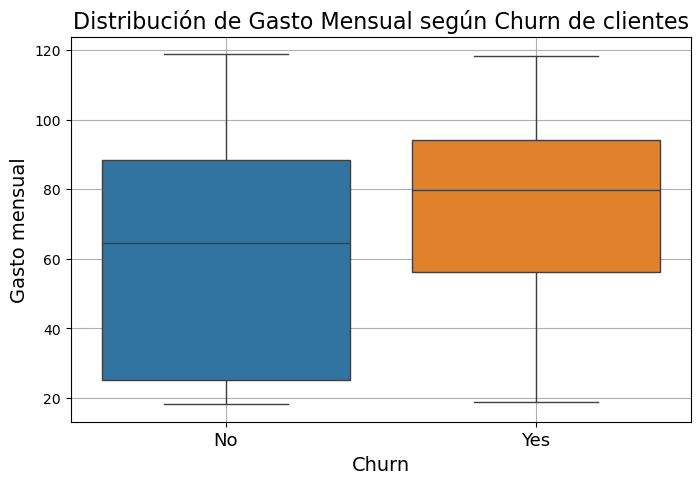

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_churn, x='Churn', y='Charges.Monthly', hue='Churn', palette='tab10')
plt.title('Distribuci√≥n de Gasto Mensual seg√∫n Churn de clientes', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Gasto mensual', fontsize=14)
plt.xticks(fontsize=13)
plt.grid(True)
plt.show()

#### Observaciones: Boxplot de Charges.Monthly (gasto mensual) seg√∫n Churn (abandono) de clientes.

`Boxplot Churn == 'Yes'`

*Caracter√≠sticas:*

* El 50% *(Q1 a Q3)* de los clientes que abandonan la empresa gastan entre 56 y 95 d√≥lares aproximadamente *(limites de la caja)*.
* Mediana ~79.
* No existen valores at√≠picos.

*Interpretaci√≥n:*

* La caja de `Churn == 'Yes'` es m√°s compacta que la de `Churn == 'No'` al igual que en el an√°lisis anterior, esto quiere decir que la distribuci√≥n de los clientes que abandonan la empresa es m√°s concentrada que los que no lo hacen. Lo que podr√≠a indicar que el gasto mensual del cliente es un gran influyente en relaci√≥n al abandono.
* **Mediana ~79**: 50% del total de clientes que dejan la empresa gasta entre ~19 USD y ~79 USD de manera mensual.
* **Primer cuartil (Q1) y Mediana (Q2)**: La dispersi√≥n en este rango es m√°s amplia, siendo entre 56 USD y 79 USD mensuales, lo que implica que la variedad en cuanto a la disconformidad de precio en este rango puede deberse a varias razones.
* **Tercer cuartil (Q3):** Como se vio anteriormente, el 50% de los clientes que abandonan la empresa gastan hasta 79 USD mensuales, y el 75% de los clientes que la empresa pierde gasta entre 79 USD y 90 USD.


`Boxplot Churn == 'No'`

*Caracter√≠sticas:*

* El gasto mensual de los clientes que deciden mantenerse en la empresa se eleva hasta los ~88 USD mensuales *(Q3)*.
* Mediana ~65.
* No existen valores at√≠picos.


*Interpretaci√≥n*

* **Mediana ~65:** El 50% de clientes que deciden quedarse gastan hasta 65 USD mensuales.
* **Rango intercuart√≠lico (IQR):** La dispersion de los clientes que se mantienen en la empresa es m√°s dispersa en comparaci√≥n a aquellos que deciden abandonar, en un rango de aproximadamente 53 USD mensuales (88 USD - 25 USD). Esto los clientes que deciden quedarse est√°n conformes con el precio que pagan por los serivicios adquiridos mensualmente.

**Conclusiones:**

* La variedad en cuanto a la disconformidad de los precios entre 56 y 79 USD mensuales, puede derivar en el an√°lisis de tipo y cantidad de servicios de cada cliente y el precio que paga mensualmente, para entender por qu√© deciden dejar la empresa.
* La concentraci√≥n de registros con un gasto entre 79 y 96 USD mensuales resulta cr√≠tica ya que una diferencia de 11 USD mensaules abarca una cuarta parte de los clientes que abandonan la empresa, por lo que la empresa podr√≠a ajustar su precificaci√≥n o generar promoci√≥nes que ayuden a la permanencia del cliente hasta los 18 meses aproximadamente, ya que en el an√°lisis anterior fue posible observar que los clientes con m√°s de 16 meses de permanencia en la empresa tienden a quedarse.
* Es posible observar que la mediana de los clientes que deciden abandonar la empresa *(Churn = 'Yes')* segun el gasto mensual en el que incurren, coincide con aproximadamente el 68% de los clientes que deciden quedarse. Lo que sugiere que aquellos clientes con un gasto mensual mayor a 79USD son clientes con riesgo potencial a abandonar la empresa.


#### üìå 3. ¬øExiste relaci√≥n en el gasto total a lo largo del ciclo de vida del cliente en la empresa y la posiblidad de abandono?

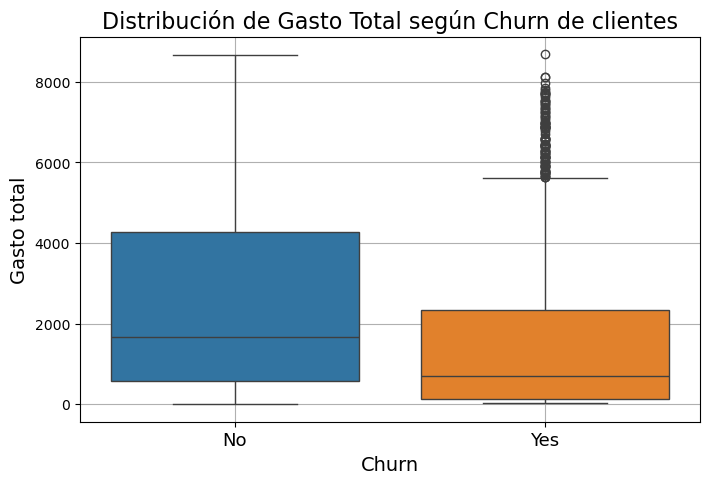

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_churn, x='Churn', y='Charges.Total', hue='Churn', palette='tab10')
plt.title('Distribuci√≥n de Gasto Total seg√∫n Churn de clientes', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Gasto total', fontsize=14)
plt.xticks(fontsize=13)
plt.grid(True)
plt.show()

#### Observaciones: Boxplot de Charges.Total (gasto total) seg√∫n Churn (abandono) de clientes.

`Boxplot Churn == Yes`

*Caracter√≠sticas:*

* Los limites de la caja van desde ~50 hasta ~2200
* Mediana ~800
* Existen varios registros con valores at√≠picos

*Interpretaci√≥n:*

* Existe una gran concentraci√≥n de clientes que abandonan con un gasto total entre ~50 y ~800. Teniendo en cuenta que el promedio de gasto mensual es de 64 USD, esto concuerda con la observaci√≥n de que gran parte de los clientes que deciden abandonar la empresa lo hacen antes de los 12 meses de antiguedad.
* **Valores At√≠picos**: Existe una notable cantidad de clientes con un gasto total elevado que han decidido dejar la empresa. Lo l√≥gico es que sean clientes con una antig√ºedad considerable, ya que el gasto total supera los 5500 USD. Estos clientes no resaltaron en los dos an√°lisis previos, lo que indica que si bien la tendencia de los clientes es abandonar en las etapas tempranas de la relaci√≥n con la empresa, existe un grupo de clientes que han decidido abandonar despu√©s de una relaci√≥n ya consolidada, por lo que ser√≠a interesante evaluar este grupo por separado para entender que factores influyeron en el abandono y dise√±ar estrategias de retenci√≥n.

`Boxplot Churn == No`

*Caracter√≠sticas:*

* Los limites de la caja van desde ~700 hasta ~4200
* Mediana ~1800
* No existen registros con valores at√≠picos

*Interpretaci√≥n:*

* El 50% de clientes que decide quedarse en la empresa tiene un Gasto Total entre 700 y 4200 USD, lo que coincide con una relaci√≥n ya estable con la organizaci√≥n.

**Conclusiones:**

* Este an√°lisis verifica lo observado en relaci√≥n al abandono en las etapas tempranas de la relaci√≥n del cliente con la empresa.
* Adem√°s, ha sido posible identificar que existe un grupo de clientes que decidieron abandonar la empresa con una antig√ºedad considerable, y que el gasto total de estos es bastante elevado, por lo que es necesario evaluar este grupo por separado y entender qu√© hizo que decidieran terminar su relaci√≥n con la organizaci√≥n.

In [36]:
churn_yes = df_churn.query('Churn == "Yes"')
total_q1 = churn_yes['Charges.Total'].quantile(0.25)
total_q3 = churn_yes['Charges.Total'].quantile(0.75)
total_iqr = total_q3 - total_q1
upper_bound = total_iqr + total_iqr * 1.5
print(f'L√≠mite superior de Boxplot Churn = "Yes" en relaci√≥n al Gasto total: {upper_bound}')
outliers_churn_yes = churn_yes[churn_yes['Charges.Total'] > upper_bound]
print(f'Cantidad de valores at√≠picos de Churn = "Yes" en relaci√≥n al Gasto Total: {len(outliers_churn_yes)} clientes')

L√≠mite superior de Boxplot Churn = "Yes" en relaci√≥n al Gasto total: 5492.0
Cantidad de valores at√≠picos de Churn = "Yes" en relaci√≥n al Gasto Total: 121 clientes


### Conclusiones: Antig√ºedad y Facturaci√≥n

De las tres preguntas correspondientes a esta secci√≥n, se concluye lo siguiente:

* **Antig√ºedad y gasto total** muestran un fuerte v√≠nculo con el abandono, por lo que `Tenure` y `Charges.Total` se perfilan como variables potencialmente relevantes para el modelo predictivo de `Churn`.
* Se identific√≥ un grupo de **clientes de alto valor que abandonan**, lo cual no concuerda con el patr√≥n general (abandono temprano). Este segmento deber√≠a ser investigado en profundidad ‚Äîpor ejemplo, a trav√©s de entrevistas post-baja o an√°lisis multivariable‚Äî para detectar patrones comunes o eventos desencadenantes, con el objetivo de generar alertas tempranas.
* Se observa una **alta concentraci√≥n de abandono** cuando el gasto mensual supera los **79 USD**, dentro de un margen de **11 USD**. Esto sugiere que podr√≠a haber sensibilidad al precio en la gama **media-alta**, posiblemente por la competencia. Reforzando as√≠ la necesidad de analizar la relaci√≥n entre `MonthlyCharges`, **tipo de servicios contratados y churn**, para ajustar estrategias de precio y retenci√≥n.

### Servicios

#### üìå 4. ¬øLos clientes que tienden a abandonar la empresa cuentan con servicio de tel√©fono, internet o ambos?


In [37]:
df_servicios = df_churn.copy()

In [38]:
df_servicios.head(0)

Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]

In [39]:
df_servicios.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'], axis=1, inplace=True)
df_servicios.head()

Churn PhoneService MultipleLines InternetService OnlineSecurity  \
0    No          Yes            No             DSL             No   
1    No          Yes           Yes             DSL             No   
2   Yes          Yes            No     Fiber optic             No   
3   Yes          Yes            No     Fiber optic             No   
4   Yes          Yes            No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0          Yes               No         Yes         Yes              No   
1           No               No          No          No             Yes   
2           No              Yes          No          No              No   
3          Yes              Yes          No         Yes             Yes   
4           No               No         Yes         Yes              No   

         Contract PaperlessBilling     PaymentMethod  Charges.Monthly  \
0        One year              Yes      Mailed check             65.6   
1  Month-to-month               No      Mailed check             59.9   
2  Month-to-month              Yes  Electronic check             73.9   
3  Month-to-month              Yes  Electronic check             98.0   
4  Month-to-month              Yes      Mailed check             83.9   

   Charges.Total  
0         593.30  
1         542.40  
2         280.85  
3        1237.85  
4         267.40

**Phone Service**

In [40]:
df_phone = df_servicios.groupby('Churn')['PhoneService'].value_counts().to_frame()
df_phone.reset_index(inplace=True)

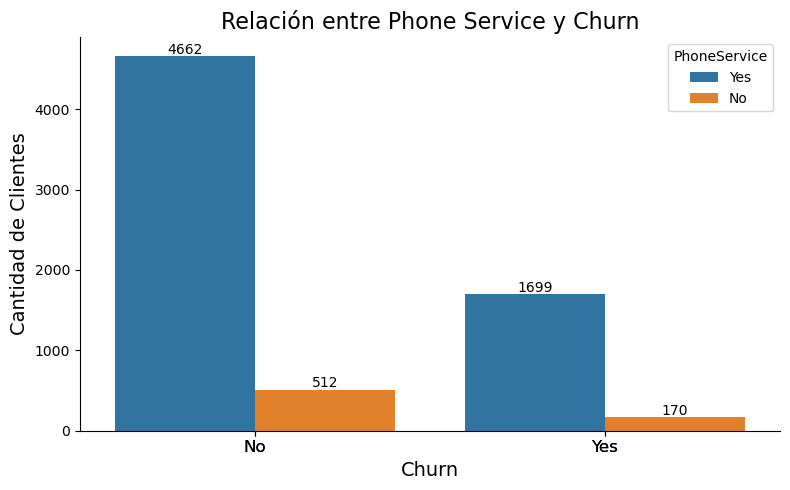

In [41]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=df_phone, x='Churn', y='count', hue='PhoneService', palette='tab10')

ax.set_title('Relaci√≥n entre Phone Service y Churn', fontsize=16)
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Cantidad de Clientes', fontsize=14)
ax.legend(title='PhoneService')
ax.set_xticks(ticks=df_phone['Churn'], labels=df_phone['Churn'], ha='center', size=12)

for bar in ax.patches:
    altura = bar.get_height()
    if altura == 0:
        continue
    else:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            altura + 30,
            f'{altura:.0f}',
            ha='center')


sns.despine()
plt.tight_layout()
plt.show()

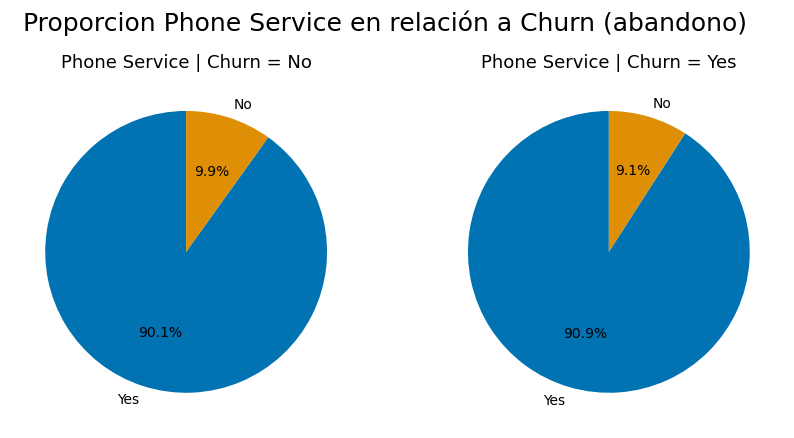

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

grupo_no = df_phone[df_phone['Churn'] == 'No']
grupo_yes = df_phone[df_phone['Churn'] == 'Yes']

axes[0].pie(grupo_no['count'],
            labels=grupo_no['PhoneService'],
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette('colorblind')
           )
axes[0].set_title('Phone Service | Churn = No', fontsize=13)

axes[1].pie(grupo_yes['count'],
            labels=grupo_no['PhoneService'],
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette('colorblind')
           )
axes[1].set_title('Phone Service | Churn = Yes', fontsize=13)

plt.suptitle('Proporci√≥n Phone Service en relaci√≥n a Churn (abandono)', fontsize=18)

plt.show()

**Internet Service**

In [43]:
df_internet = df_servicios.groupby('Churn')['InternetService'].value_counts().to_frame()
df_internet

count
Churn InternetService       
No    DSL               1962
      Fiber optic       1799
      No                1413
Yes   Fiber optic       1297
      DSL                459
      No                 113

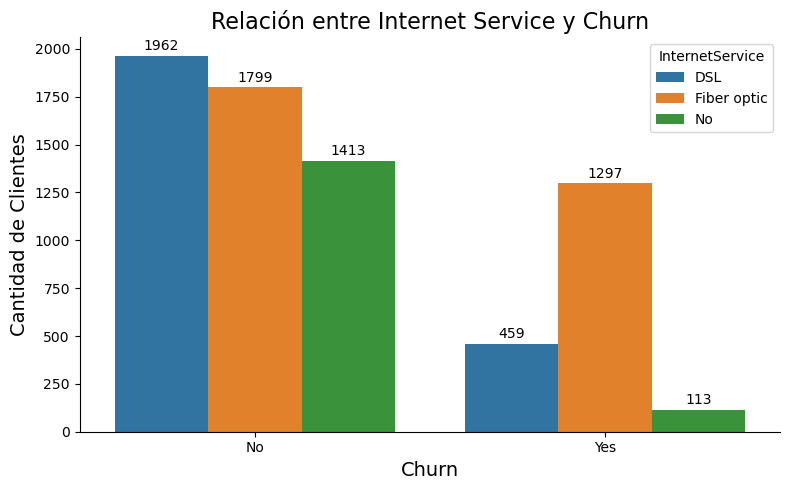

In [44]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=df_internet, x='Churn', y='count', hue='InternetService', palette='tab10')

ax.set_title('Relaci√≥n entre Internet Service y Churn', fontsize=16)
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Cantidad de Clientes', fontsize=14)
ax.legend(title='InternetService')

for bar in ax.patches:
    altura = bar.get_height()
    if altura == 0:
        continue
    else:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            altura + 30,
            f'{altura:.0f}',
            ha='center')
    
sns.despine()
plt.tight_layout()
plt.show()

In [45]:
df_ambos_servicios = df_servicios.copy()
df_ambos_servicios['InternetService'] = df_ambos_servicios['InternetService'].map({'Fiber optic': 'Yes', 'DSL': 'Yes'})
df_ambos_servicios = df_ambos_servicios.query('PhoneService == "Yes" & InternetService == "Yes"')
df_ambos_servicios.groupby('Churn')['Churn'].value_counts()

Churn
No     3249
Yes    1586
Name: count, dtype: int64

#### üìå 5. ¬øExiste relaci√≥n entre la cantidad de servicios contratados y el abandono del cliente?

### Perfil del cliente

#### üìå 6. ¬øAlg√∫n g√©nero tiene mayor tendencia a dejar la empresa?

#### üìå 7. ¬øLa edad (espec√≠ficamente ser un ciudadano mayor), influye en la posibilidad de que un cliente abandone?

#### üìå 8. ¬øExiste relaci√≥n entre la situaci√≥n familiar del cliente *(pareja, personas a cargo)* y la posibilidad de abandono?